
## Lesson 3 Assignment - Monty Hall Simulation

Author - Mike Pearson

We will play a bit with goats and cars, and then get into the real simulation.

In [186]:
# Import libraries
import numpy as np
import itertools
import pandas as pd
from matplotlib import pyplot

goat1 = 'goat'
goat2 = 'goat'
car = 'car'


doors = pd.DataFrame(
    list(itertools.permutations(['goat', 'goat', 'car'],3)), 
    columns=['door1', 'door2', 'door3'])
print(len(doors))
doors.head(20)

6


,door1,door2,door3
0,goat,goat,car
1,goat,car,goat
2,goat,goat,car
3,goat,car,goat
4,car,goat,goat
5,car,goat,goat


Let's see what we have

In [187]:
pGoattry1 = 2/3
pCartry1 = 1/3
def sim_car(num_samples):
  car_probas = [
      1/3,  # goat
      1/3,  # car
      1/3,
  ]
  
  return list(zip(
      ['Car behind Door1', 'car behind Door2', 'car behind Door3'], 
      np.random.multinomial(num_samples, car_probas)/num_samples))
  
sim_car(1000)

[('Car behind Door1', 0.334),
 ('car behind Door2', 0.318),
 ('car behind Door3', 0.348)]

## What if?

If you choose door x, what is probability that you will win the car if you do not switch?

Clearly that is just the probability that the car is behind the door.

What if you switch doors?

If you choose door 1 and Monte opens door 2.

## Two ways of choosing

Let the player make a single choice and never change. What is the percentage of correct guesses?

Let the player make a choice, then switch the choice to the other door - when a door with a goat behind it is chosen.

"stay_choice" is the probability of winning the car if you stay with your first choice

In [188]:
def stay_choice(tries):
    door = [1, 2, 3]
    i = 1
    correct = 0
    wrong = 0
    while i <= tries:
        car = np.random.choice(door, 1)
        door_chosen = np.random.choice(door, 1)
        if car == door_chosen:
              correct += 1
        else :
            wrong += 1
        i += 1
    return(correct/tries)


## The other method...

"change_choice" calculates the probability of winning if you switch automatically. Essentially, the only time you will lose is when you chose the correct door on your first guess.


In [189]:
def change_choice(tries):
        door = [1, 2, 3]
        i = 1
        correct = 0
        wrong = 0
        while i <= tries:
            car = np.random.choice(door, 1)
            door_chosen = np.random.choice(door, 1)
            if car == door_chosen:
                wrong += 1
            else:
                correct += 1
            i += 1
        return(correct/tries)

In [190]:
tries = 100
print('probability of winning when you stay par', stay_choice(tries))
print('probability of winning when you stay par', change_choice(tries))


probability of winning when you stay par 0.36
probability of winning when you stay par 0.62


We will run that simulation a thousand times and see what the probabilites of each are, and make a histogram

In [191]:
def keep_sim(tries, trials):
    keep_results = pd.Series(stay_choice(tries))
    i = 1
    while i <= trials:
        keep_results[i]= stay_choice(tries)
        i += 1
    pyplot.hist(keep_results.values)
    return(print('the mean probability of winning with the first choice is', np.mean(keep_results.values)), print('the standard dev is', np.std(keep_results.values)))



In [192]:
def switch_sim(tries, trials):
    switch_always = pd.Series(change_choice(tries))
    i = 1
    while i <= trials:
        switch_always[i]= change_choice(tries)
        i += 1
    pyplot.hist(switch_always.values)
    return(print('the mean probability of winning with switching is', np.mean(switch_always.values)), print('the standard dev is', np.std(switch_always.values)))


## Keeping it on the First Choice




the mean probability of winning with the first choice is 0.3336996300369963
the standard dev is 0.046888927389224226


(None, None)

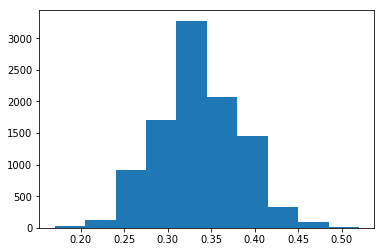

In [193]:
trials = 10000
keep_sim(tries, trials)


## Staying

Above is the histogram of 10,000 trials of 100 tries of standing with your first choice. If you stay on your first choice, you will be successful roughly a third of the time. There is no great variation

the mean probability of winning with switching is 0.6663593640635936
the standard dev is 0.047027792668030054


(None, None)

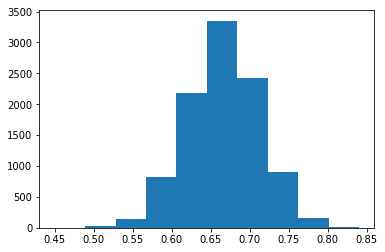

In [194]:
switch_sim(tries, trials)

## Switching

Above is the histogram of 10,000 trials of 100 tries of always switching. If you switch from your first choice, you will be successful roughly a two thirds of the time. If you look at the two histograms, you will see that switching is never worse than the best (unusual) results from staying pat.

## You should play the switch strategy!